In [1]:
#Import libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
#Load the dataset
Training = pd.read_csv('TrainingSet.csv')
Test = pd.read_csv('TestSet.csv')

In [3]:
#Prints the name of features in the dataset
Training.keys()

Index(['EbayID', 'QuantitySold', 'Price', 'PricePercent', 'StartingBidPercent',
       'SellerName', 'SellerClosePercent', 'Category', 'PersonID',
       'StartingBid', 'AvgPrice', 'EndDay', 'HitCount', 'AuctionAvgHitCount',
       'ItemAuctionSellPercent', 'SellerSaleAvgPriceRatio', 'SellerAvg',
       'SellerItemAvg', 'AuctionHitCountAvgRatio', 'BestOffer',
       'ReturnsAccepted', 'IsHOF', 'ItemListedCount', 'AuctionCount',
       'AuctionSaleCount', 'SellerAuctionCount', 'SellerAuctionSaleCount',
       'AuctionMedianPrice'],
      dtype='object')

In [4]:
#Preprocessing Step 1:
#Check if Training and test set has any null values or not
print(Training.isnull().values.any())
print(Test.isnull().values.any())

False
False


In [5]:
#Apply correlation to data to check relation between different columns
correlation = Training.corr()
correlation

,EbayID,QuantitySold,Price,PricePercent,StartingBidPercent,SellerClosePercent,Category,PersonID,StartingBid,AvgPrice,...,AuctionHitCountAvgRatio,BestOffer,ReturnsAccepted,IsHOF,ItemListedCount,AuctionCount,AuctionSaleCount,SellerAuctionCount,SellerAuctionSaleCount,AuctionMedianPrice
EbayID,1.000000,0.051621,-0.053406,0.000145,-0.001235,0.082350,0.070322,-0.015432,-0.078355,-0.031546,...,-0.080177,-0.015042,NaN,0.111208,-0.042256,-0.034686,-0.041640,0.173196,0.236649,-0.042258
QuantitySold,0.051621,1.000000,0.061080,-0.034879,-0.050568,0.626917,-0.057478,0.010823,-0.172144,0.108310,...,0.143061,0.439053,NaN,0.014467,0.096494,0.106792,0.160403,-0.078832,0.236291,0.179222
Price,-0.053406,0.061080,1.000000,0.024128,0.016414,0.088385,-0.305892,0.011476,0.844167,0.397352,...,0.539702,0.146629,NaN,-0.066227,0.276417,0.317842,0.380123,-0.174107,-0.059713,0.677254
PricePercent,0.000145,-0.034879,0.024128,1.000000,0.999446,-0.036416,0.005503,0.001540,0.030438,-0.015804,...,-0.007183,0.011242,NaN,0.004255,-0.012742,-0.019745,-0.018190,0.007062,-0.015258,-0.021811
StartingBidPercent,-0.001235,-0.050568,0.016414,0.999446,1.000000,-0.052484,0.007185,0.001592,0.034863,-0.018725,...,-0.012384,-0.004336,NaN,0.003355,-0.016108,-0.023633,-0.023521,0.008918,-0.020860,-0.027164
SellerClosePercent,0.082350,0.626917,0.088385,-0.036416,-0.052484,1.000000,-0.086185,0.012070,-0.163144,0.120629,...,0.205835,0.384663,NaN,0.014416,0.109219,0.123390,0.170401,-0.150081,0.360049,0.200841
Category,0.070322,-0.057478,-0.305892,0.005503,0.007185,-0.086185,1.000000,-0.001267,-0.258967,-0.191164,...,-0.345987,-0.050477,NaN,-0.020137,-0.166870,-0.232057,-0.187439,0.100096,0.028717,-0.311149
PersonID,-0.015432,0.010823,0.011476,0.001540,0.001592,0.012070,-0.001267,1.000000,0.013099,0.012036,...,0.010731,0.040926,NaN,-0.023821,-0.122562,-0.079213,-0.061620,-0.035264,-0.015783,0.020187
StartingBid,-0.078355,-0.172144,0.844167,0.030438,0.034863,-0.163144,-0.258967,0.013099,1.000000,0.288179,...,0.408400,-0.093911,NaN,-0.076905,0.223201,0.233173,0.262384,-0.157329,-0.139745,0.486580
AvgPrice,-0.031546,0.108310,0.397352,-0.015804,-0.018725,0.120629,-0.191164,0.012036,0.288179,1.000000,...,0.364373,0.093788,NaN,-0.041922,0.175701,0.188671,0.230760,-0.100043,-0.020879,0.545672


In [6]:
#Training data drop QuantitySold, SellerName,EndDay  column
trainData = Training.drop(['QuantitySold','SellerName','EndDay'],axis=1)
testData = Test.drop(['QuantitySold','SellerName','EndDay'],axis=1)
#Target Data has QuantitySold column
targetTrainData = Training['QuantitySold'] 
targetTestData = Test['QuantitySold'] 

In [7]:
#Preprocessing Step 2
#Standardize and scale the data
from sklearn import preprocessing
trainDataScale = preprocessing.scale(trainData)
testDataScale = preprocessing.scale(testData)

c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """
c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not 

In [8]:
#Preprocessing Step 3
#Apply lasso to see the important features
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.01)
lasso.fit(trainDataScale,targetTrainData)
print(lasso.coef_)
print(trainData.keys())

[ 0.         -0.         -0.         -0.          0.19219888 -0.
 -0.         -0.04162887  0.          0.06626032  0.00923094 -0.
  0.06320198 -0.00448244 -0.         -0.          0.05594668  0.
  0.          0.          0.         -0.          0.          0.01270418
 -0.        ]
Index(['EbayID', 'Price', 'PricePercent', 'StartingBidPercent',
       'SellerClosePercent', 'Category', 'PersonID', 'StartingBid', 'AvgPrice',
       'HitCount', 'AuctionAvgHitCount', 'ItemAuctionSellPercent',
       'SellerSaleAvgPriceRatio', 'SellerAvg', 'SellerItemAvg',
       'AuctionHitCountAvgRatio', 'BestOffer', 'ReturnsAccepted', 'IsHOF',
       'ItemListedCount', 'AuctionCount', 'AuctionSaleCount',
       'SellerAuctionCount', 'SellerAuctionSaleCount', 'AuctionMedianPrice'],
      dtype='object')


In [9]:
#Choose the important features only i.e. 'SellerClosePercent','HitCount', 'BestOffer' and again standardize
trainData=Training[['SellerClosePercent', 'StartingBid','HitCount', 'AuctionAvgHitCount','SellerSaleAvgPriceRatio', 'SellerAvg','BestOffer','SellerAuctionSaleCount']]
testData=Test[['SellerClosePercent', 'StartingBid','HitCount', 'AuctionAvgHitCount','SellerSaleAvgPriceRatio', 'SellerAvg','BestOffer','SellerAuctionSaleCount']]
trainDataScale = preprocessing.scale(trainData)
testDataScale = preprocessing.scale(testData)

c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


In [10]:
#Preprocessing Step 4
#Perform Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents0 = pca.fit_transform(trainDataScale)
trainDataScaled = pd.DataFrame(data = principalComponents0)
principalComponents1 = pca.fit_transform(testDataScale)
testDataScaled = pd.DataFrame(data = principalComponents1)

In [11]:
# Function for ROC Curve and Lift Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def roc_plot(actual, probability, model_name):
    """
    Inputs: 
    - actual values of y_test (1 dimensional array)
    - probability estimate of y_test (1 dimensional array)
    - name of the classifier (string)
    
    Output: ROC plot with AUC
    """
    fpr, tpr, _ = roc_curve(actual, probability)
    plt.title(model_name+'Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc(fpr, tpr))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()

def lift_plot(actual, probability, model_name):
    """
    Inputs: 
    - actual values of y_test (1 dimensional array)
    - probability estimate of y_test (1 dimensional array)
    - name of the classifier (string)
    
    Output: Cummulative Gain Chart and Lift Curve
    """
    actual = pd.Series(actual)
    fpr, tpr, thresholds = roc_curve(actual, probability)
    ppr=(tpr*actual.sum()+fpr*(actual.count()-actual.sum()))/actual.count()
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(ppr, tpr, label='')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('%Population')
    plt.ylabel('%Target')
    plt.title(model_name+'Cumulative Gains Chart')
    plt.legend(loc="lower right")

    plt.subplot(1,2,2)
    plt.plot(ppr, tpr/ppr, label='')
    plt.plot([0, 1], [1, 1], 'k--')
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('%Population')
    plt.ylabel('Lift')
    plt.title(model_name+'Lift Curve')

Classification Techniques :
Classification Technique 1 : 
K Nearest Neighbor
Confusion Matrix:
 Predicted      0     1    All
Actual                       
0          25477  2584  28061
1           2407  6992   9399
All        27884  9576  37460
Accuracy 0.866764548852109
Recall 0.7439089264815406
Precision 0.7301587301587301
F-score 0.7369696969696969


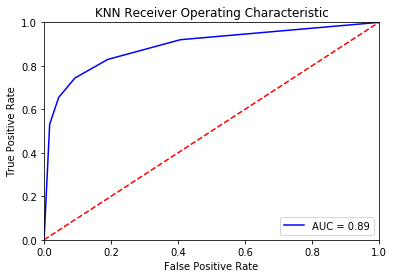

No handles with labels found to put in legend.


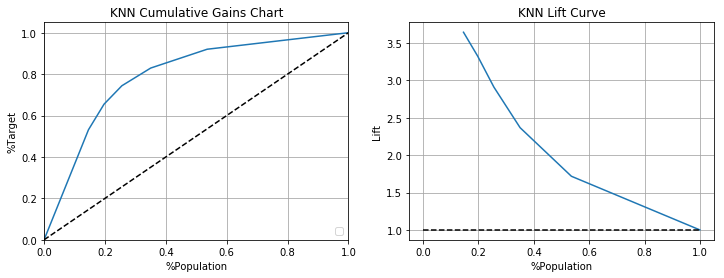

In [18]:
#Do Classification using various models
print('Classification Techniques :')
#Classification Technique 1
print('Classification Technique 1 : ')
#Create the classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
ClassifierKNN = KNeighborsClassifier()
#Train the classifier 
ClassifierKNN.fit(trainDataScaled,targetTrainData)
print('K Nearest Neighbor')
#Predict on test data
PredictKNN = ClassifierKNN.predict(testDataScaled)
ProbabilityKNN = ClassifierKNN.predict_proba(testDataScaled)[:,1]
#Confusion Matrix
confusionMatrixKNN = pd.crosstab(targetTestData,PredictKNN, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('Confusion Matrix:\n',confusionMatrixKNN)
#Checking the accuracy if prediction of test data is correct
AccuracyKNN = metrics.accuracy_score(targetTestData, PredictKNN)
print ('Accuracy',AccuracyKNN)
#Recall
RecallKNN = metrics.recall_score(targetTestData, PredictKNN)
print ('Recall',RecallKNN)
#Precision
PrecisionKNN = metrics.precision_score(targetTestData, PredictKNN)
print ('Precision',PrecisionKNN)
#F-score
FscoreKNN = metrics.f1_score(targetTestData, PredictKNN)
print ('F-score',FscoreKNN)
#ROC Plot
roc_plot(targetTestData,ProbabilityKNN,'KNN ')
#Lift Curve
lift_plot(targetTestData,ProbabilityKNN,'KNN ')

Classification Technique 2 :
Decision Tree
Confusion Matrix:
 Predicted      0      1    All
Actual                        
0          23409   4652  28061
1           2577   6822   9399
All        25986  11474  37460
Accuracy 0.8070208222103578
Recall 0.7258218959463772
Precision 0.5945616175701586
F-score 0.6536674172375796


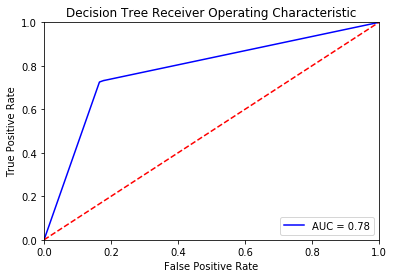

No handles with labels found to put in legend.


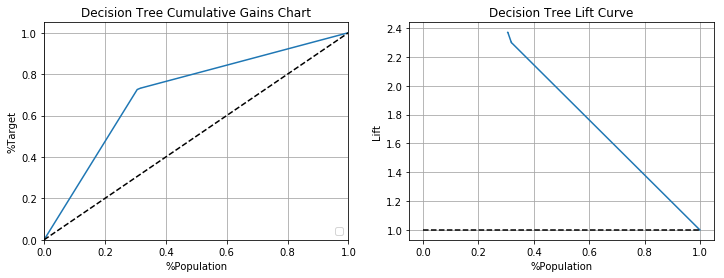

In [19]:
#Classification Technique 2
print('Classification Technique 2 :')
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Create the classifier
ClassifierDecisionTree = DecisionTreeClassifier()
#Train the classifier 
ClassifierDecisionTree.fit(trainDataScaled,targetTrainData)
print('Decision Tree')
#Predict on test data
PredictDecisionTree = ClassifierDecisionTree.predict(testDataScaled)
ProbabilityDecisionTree = ClassifierDecisionTree.predict_proba(testDataScaled)[:,1]
#Confusion Matrix
confusionMatrixDecisionTree = pd.crosstab(targetTestData,PredictDecisionTree, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('Confusion Matrix:\n',confusionMatrixDecisionTree)
#Checking the accuracy if prediction of test data is correct
from sklearn.metrics import accuracy_score
AccuracyDecisionTree=metrics.accuracy_score(targetTestData, PredictDecisionTree)
print('Accuracy',AccuracyDecisionTree)
#Recall
from sklearn.metrics import recall_score
RecallDecisionTree=metrics.recall_score(targetTestData, PredictDecisionTree)
print('Recall',RecallDecisionTree)
#Precision
from sklearn.metrics import precision_score
PrecisionDecisionTree=metrics.precision_score(targetTestData, PredictDecisionTree)
print('Precision',PrecisionDecisionTree)
#F-score
from sklearn.metrics import f1_score
FscoreDecisionTree=metrics.f1_score(targetTestData, PredictDecisionTree)
print('F-score',FscoreDecisionTree)
#ROC Plot
roc_plot(targetTestData,ProbabilityDecisionTree,'Decision Tree ')
#Lift Curve
lift_plot(targetTestData,ProbabilityDecisionTree,'Decision Tree ' )

Classification Technique 3 :
Logistic Regression
Confusion Matrix:
 Predicted      0     1    All
Actual                       
0          26246  1815  28061
1           2695  6704   9399
All        28941  8519  37460
Accuracy 0.8796049119060331
Recall 0.7869468247446884
Precision 0.7132673688690286
F-score 0.7482978010938721


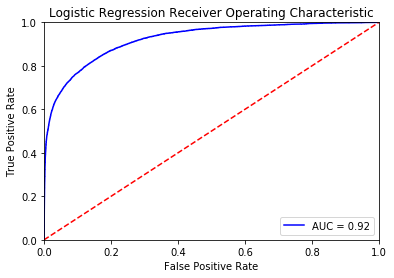

No handles with labels found to put in legend.


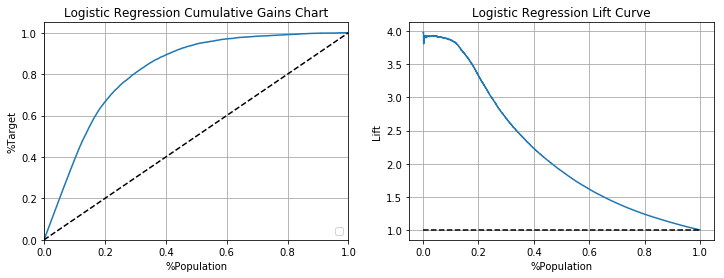

In [20]:
print('Classification Technique 3 :')
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#Create the classifier
ClassifierLogisticRegression = LogisticRegression()
#Train the classifier 
ClassifierLogisticRegression.fit(trainDataScaled,targetTrainData)
print('Logistic Regression')
#Predict on test data
PredictLogisticRegression = ClassifierLogisticRegression.predict(testDataScaled)
ProbabilityLogisticRegression = ClassifierLogisticRegression.predict_proba(testDataScaled)[:,1]
#Confusion Matrix
confusionMatrixLogisticRegression = pd.crosstab(targetTestData,PredictLogisticRegression, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('Confusion Matrix:\n',confusionMatrixLogisticRegression)
#Checking the accuracy if prediction of test data is correct
from sklearn.metrics import accuracy_score
AccuracyLogisticRegression=metrics.accuracy_score(targetTestData, PredictLogisticRegression)
print('Accuracy',AccuracyLogisticRegression)
#Recall
RecallLogisticRegression = recall_score(PredictLogisticRegression,targetTestData)
print('Recall',RecallLogisticRegression)
#Precision
PrecisionLogisticRegression = precision_score(PredictLogisticRegression,targetTestData)
print('Precision',PrecisionLogisticRegression)
#F-score
FscoreLogisticRegression = f1_score(PredictLogisticRegression,targetTestData)
print('F-score',FscoreLogisticRegression)
#ROC Plot
roc_plot(targetTestData,ProbabilityLogisticRegression,'Logistic Regression ')
#Lift Curve
lift_plot(targetTestData,ProbabilityLogisticRegression,'Logistic Regression ' )

In [17]:
#Classification Technique 4
print('Classification Technique 4 : ')
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#Create the classifier
print('Random Forest')
criterion=['gini','entropy']
score = []
print('Types of criterion and the corresponding scores')
for i in criterion:
    clf = RandomForestClassifier(criterion = i)
    Accuracy = cross_val_score(clf,trainDataScaled,targetTrainData,cv = 15, scoring='accuracy')
    score.append(Accuracy.mean())
for i in range(len(criterion)):
    print(criterion[i],':',score[i])
import warnings
warnings.filterwarnings('ignore')
print('Score is maximum for entropy criterion')

Classification Technique 4 : 
Random Forest
Types of criterion and the corresponding scores


c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 i

gini : 0.8709220549620689
entropy : 0.8723064909252914
Score is maximum for entropy criterion


In [12]:
score = []
print('Value of max_depth using cross validation and the corresponding scores are:')
for i in range(10):
    clf = RandomForestClassifier(criterion = 'entropy',max_depth = i+1)
    Accuracy = cross_val_score(clf,trainDataScaled,targetTrainData,cv = 5 , scoring='accuracy')
    score.append(Accuracy.mean())
for i in range(10):
    print('max_depth =',i+1,', Score =',score[i])
import warnings
warnings.filterwarnings('ignore')
print('Score is maximum when max_depth is 10')

Value of max_depth using cross validation and the corresponding scores are:


c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 i

c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 i

max_depth = 1 , Score = 0.754891827662547
max_depth = 2 , Score = 0.850932743739841
max_depth = 3 , Score = 0.8586051788123544
max_depth = 4 , Score = 0.8634120778038445
max_depth = 5 , Score = 0.8672405485642003
max_depth = 6 , Score = 0.8700945261892317
max_depth = 7 , Score = 0.872936869536678
max_depth = 8 , Score = 0.8748975254533669
max_depth = 9 , Score = 0.8764637248416506
max_depth = 10 , Score = 0.8786602658466712
Score is maximum when max_depth is 10


Confusion Matrix Predicted       0      1     All
Actual                          
0          170280   8553  178833
1           21568  58187   79755
All        191848  66740  258588
Accuracy 0.883517409933949
Recall 0.7295718136793932
Precision 0.871845969433623
F-score 0.79438888699273


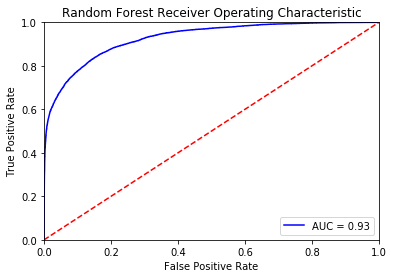

No handles with labels found to put in legend.


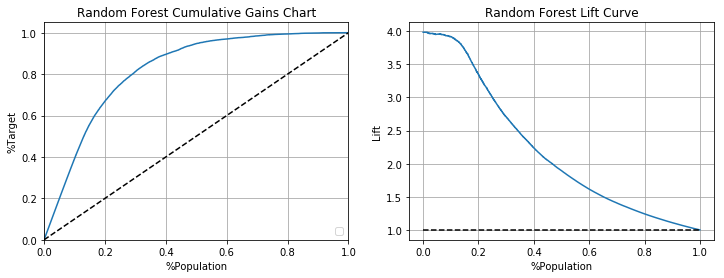

In [21]:
ClassifierRandomForest = RandomForestClassifier(criterion = 'entropy',max_depth=10)
#Train the classifier 
ClassifierRandomForest.fit(trainDataScaled,targetTrainData)
#Predict on test data
PredictRandomForest = ClassifierRandomForest.predict(trainDataScaled)
ProbabilityRandomForest = ClassifierRandomForest.predict_proba(testDataScaled)[:,1]
#Confusion Matrix
confusionMatrixRandomForest = pd.crosstab(targetTrainData,PredictRandomForest, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('Confusion Matrix',confusionMatrixRandomForest)
#Checking the accuracy if prediction of test data is correct
AccuracyRandomForest = metrics.accuracy_score(targetTrainData,PredictRandomForest)
print('Accuracy',AccuracyRandomForest)
#Recall
RecallRandomForest = metrics.recall_score(targetTrainData,PredictRandomForest)
print('Recall',RecallRandomForest)
#Precision
PrecisionRandomForest = metrics.precision_score(targetTrainData,PredictRandomForest)
print('Precision',PrecisionRandomForest)
#F-score
FscoreRandomForest = metrics.f1_score(targetTrainData,PredictRandomForest)
print('F-score',FscoreRandomForest)
#ROC Plot
roc_plot(targetTestData,ProbabilityRandomForest,'Random Forest ')
#Lift Curve
lift_plot(targetTestData,ProbabilityRandomForest,'Random Forest ' )

Classification Technique 5 : 
Gradient Boosting
Confusion Matrix Predicted       0      1     All
Actual                          
0          169170   9663  178833
1           21148  58607   79755
All        190318  68270  258588
Accuracy 0.8808490726561171
Recall 0.7348379411949094
Precision 0.8584590596162297
F-score 0.7918527275798006


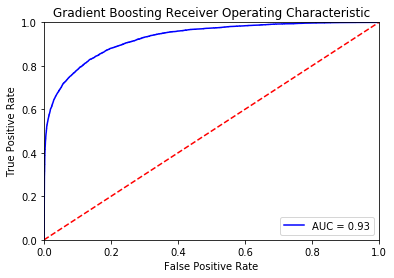

No handles with labels found to put in legend.


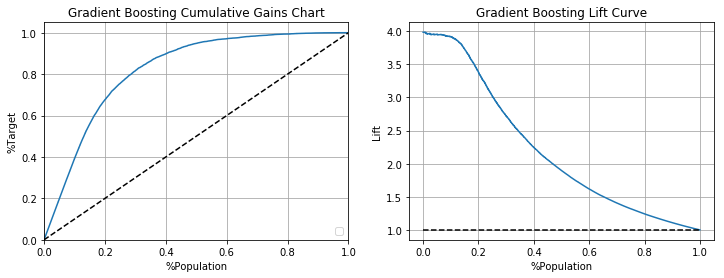

In [22]:
#Classification Technique 5
print('Classification Technique 5 : ')
#Gradient Boosting model
from sklearn.ensemble import GradientBoostingClassifier
#Create the classifier
ClassifierGBC = GradientBoostingClassifier(random_state=0)
#Train the classifier 
ClassifierGBC.fit(trainDataScaled,targetTrainData)
print('Gradient Boosting')
#Predict on test data
PredictGBC = ClassifierGBC.predict(trainDataScaled)
ProbabilityGBC = ClassifierGBC.predict_proba(testDataScaled)[:,1]
#Confusion Matrix
confusionMatrixGBC = pd.crosstab(targetTrainData,PredictGBC, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('Confusion Matrix',confusionMatrixGBC)
#Checking the accuracy if prediction of test data is correct
AccuracyGBC = metrics.accuracy_score(targetTrainData,PredictGBC)
print('Accuracy',AccuracyGBC)
#Recall
RecallGBC = metrics.recall_score(targetTrainData,PredictGBC)
print('Recall',RecallGBC)
#Precision
PrecisionGBC = metrics.precision_score(targetTrainData,PredictGBC)
print('Precision',PrecisionGBC)
#F-score
FscoreGBC = metrics.f1_score(targetTrainData,PredictGBC)
print('F-score',FscoreGBC)
#ROC Plot
roc_plot(targetTestData,ProbabilityGBC,'Gradient Boosting ')
#Lift Curve
lift_plot(targetTestData,ProbabilityGBC,'Gradient Boosting ' )

In [23]:
#Plot the features
def plot_feature_importances_mydata(model):
    n_features = trainDataScaled.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(trainDataScaled))
    plt.xlabel("Variable importance")
    plt.ylabel("Independent Variable")

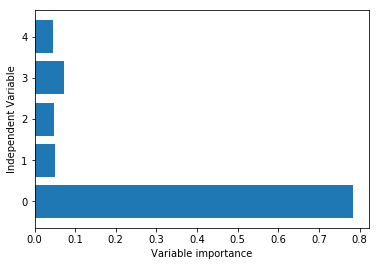

In [24]:
# Random Forest Classifier
plot_feature_importances_mydata(ClassifierRandomForest)

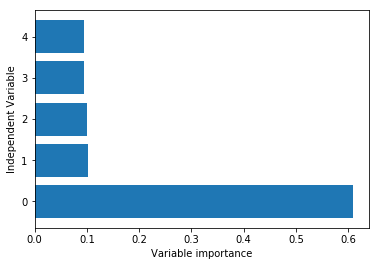

In [25]:
# Decision Tree Classifier
plot_feature_importances_mydata(ClassifierDecisionTree)

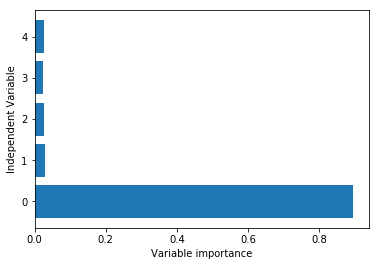

In [26]:
# Gradient Boosting Classifier
plot_feature_importances_mydata(ClassifierGBC)